# 1. load data and pre-process

In [ ]:
# word2vec implementation
from gensim.models import Word2Vec
import gensim.downloader as api

# scikit-learn relevant classes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [1]:
import pandas as pd
c1 = pd.read_csv("D:\\CODE\\data set for QTA\\c1_tokens.csv")

In [2]:
print(c1.head(2))
print(c1.shape)


                                              tokens
0  国民党, 当局, 破坏, 荷泽, 协议, 蓄意, 放, 水淹, 我, 解放区, 不顾, 七百...
1  平, 汉川, 陕道, 上, 国民党, 军运忙, 新华社, 邯郸, 九日, 电, 平汉路, 上...
(268232, 1)


In [1]:
import pandas as pd
c3 = pd.read_csv("D:\\CODE\\data set for QTA\\c3_tokens.csv")

print(c3.head(2))
print(c3.shape)

                                              tokens
0  社论, 满怀信心, 迎接, 九十年代, 伴随, 着, 年, 第一记, 钟声, 二十世纪, 九...
1  江泽民, 总书记, 新年, 前夕, 接受, 记者, 采访, 谈, 国内外, 形势, 中国, ...
(217918, 1)


In [2]:
import pandas as pd
c2 = pd.read_csv("D:\\CODE\\data set for QTA\\c2_tokens.csv")

In [3]:
print(c2.head(2))
print(c2.shape)

                                              tokens
0  乘胜前进, 人民日报, 红旗, 杂志, 解放军报, 一九七七年, 元旦, 社论, 全国, 人...
1  毛泽东, 论, 十大, 关系, 马克思主义, 列宁主义, 毛泽东思想, 万岁, 我们, 一定...
(217603, 1)


*Due to re-loading saved data, the formats of tokened data need to re-process again.*

In [2]:
# go through each row and split the tokens by comma
c1t = [t.split(", ") for t in c1['tokens']] 
print(c1t[0])

['国民党', '当局', '破坏', '荷泽', '协议', '蓄意', '放', '水淹', '我', '解放区', '不顾', '七百万', '人民', '生命', '图逞', '内战', '阴谋', '中共中央', '发言人', '表示', '坚决', '反对', '新华社', '延安', '十日', '电', '记者', '顷以', '国民党', '当局', '破坏', '荷泽', '治河', '协议', '阴谋', '淹毙', '黄河', '故道', '豫', '冀鲁', '三省', '七百万', '同胞', '事', '访问', '中共中央', '发言人', '发言人', '谈话', '如', '次', '问', '黄河', '问题', '的', '经过', '如何', '答', '黄河', '原经', '豫北', '冀南', '斜贯', '山东', '至', '利津入', '海', '民国', '二十七年', '夏', '始由', '国民党', '当局', '派', '军队', '在', '河南', '郑州', '开封', '间', '中牟县', '境', '之', '花园口', '实行', '决堤', '图', '以此', '阻止', '敌人', '的', '进攻', '自此', '黄河', '乃', '由', '花园口', '东南', '流至豫皖', '边', '入', '淮河', '转', '运河', '长江', '入海', '黄河', '决口', '的', '结果', '有百害而无一利', '加以', '国民党', '当局', '事前', '对', '人民', '保守', '秘密', '致', '黄河', '所经', '之', '地', '无数', '同胞', '之生', '命', '财产', '惨遭', '损失', '为', '抗战史', '中', '极', '惨痛', '之', '一页', '而', '淮河', '运河', '的', '水道', '亦', '因而', '遭受', '影响', '河床', '有', '逐年', '淤浅', '之虞', '现', '抗战', '结束', '以', '充分', '人力物力', '与', '友邦', '援助', '疏导', '黄河', '使', '复归', '故道', '原则上', '是', '可行

In [4]:
c2t = [t.split(", ") for t in c2['tokens']] 
print(c2t[0])


['乘胜前进', '人民日报', '红旗', '杂志', '解放军报', '一九七七年', '元旦', '社论', '全国', '人民', '在', '深入', '揭批', '四人帮', '的', '战斗', '中', '满怀', '胜利', '的', '豪情', '喜气洋洋', '地', '迎来', '了', '新', '的', '一年', '一九七六年', '是', '极', '不', '平凡', '的', '一年', '是', '我们', '取得', '了', '伟大', '的', '历史性', '胜利', '的', '一年', '这', '一年', '我们', '失去', '了', '伟大', '的', '领袖', '和', '导师', '毛泽东', '主席', '失去', '了', '敬爱', '的', '周恩来', '总理', '和', '朱德', '委员长', '我们', '遭受', '了', '地震', '等', '严重', '的', '自然灾害', '在', '我们', '党', '面临', '巨大', '困难', '的', '情况', '下', '华国锋', '同志', '为首', '的', '党中央', '领导', '我们', '一举', '粉碎', '了', '王张', '江姚', '反党集团', '篡党夺权', '的', '阴谋', '经过', '这场', '惊心动魄', '的', '阶级', '大', '搏斗', '中国', '革命', '避免', '了', '一次', '大', '曲折', '中国', '历史', '避免', '了', '一次', '大', '倒退', '中国', '人民', '避免', '了', '一场', '大灾难', '我们', '的', '胜利', '是', '毛泽东思想', '的', '伟大', '胜', '利', '是', '毛主席', '的', '无产阶级', '革命', '路线', '的', '伟大胜利', '全党全军', '全国', '各族人民', '为', '我们', '又', '有', '了', '自己', '的', '英明领袖', '华国锋', '主席', '感到', '幸福', '和', '自豪', '除掉', '四害', '人民', '大', '解放', '思想', '大', '解放', '生

In [2]:
# 删除包含 nan 值的行
c3 = c3.dropna(subset=['tokens'])
print(c3['tokens'].dtype)

c3t = [t.split(", ") for t in c3['tokens']] 
print(c3t[0])

object
['社论', '满怀信心', '迎接', '九十年代', '伴随', '着', '年', '第一记', '钟声', '二十世纪', '九十年代', '来到', '了', '回顾过去', '十年', '的', '征程', '展望未来', '十年', '的', '前景', '我们', '满怀豪情', '充满信心', '刚刚', '过去', '的', '八十年代', '是', '我国', '各族人民', '在', '中国共产党', '的', '领导', '下', '沿着', '社会主义', '道路', '胜利', '前进', '的', '年代', '是', '社会主义', '建设', '事业', '和', '社会主义', '改革', '事业', '取得', '辉煌成就', '的', '年代', '是', '社会主义', '在', '中国', '大', '地上', '生机勃勃', '显示', '了', '强大', '生命力', '的', '年代', '在', '八十年代', '我们', '以', '经济', '建设', '为', '中心', '坚持', '四项', '基本', '原则', '坚持', '改革开放', '社会主义', '现代化', '建设', '取得', '了', '举世瞩目', '的', '成就', '国民经济', '迅速', '增长', '国民', '生产总值', '翻了一番', '已经', '上升', '到', '居', '世界', '第', '位', '教育', '科学', '文化', '事业', '和', '国防建设', '都', '取得', '了', '巨大', '成绩', '综合国力', '显著', '增强', '人民', '生活', '明显改善', '在', '八十年代', '我们', '坚持', '四项', '基本', '原则', '党的领导', '更加', '坚强', '社会主义', '制度', '更加', '巩固', '经过', '一次', '又', '一次', '的', '斗争', '特别', '是', '去年', '春', '夏之交', '制止动乱', '和', '平息', '反革命', '暴乱', '的', '斗争', '击退', '了', '资产阶级', '自由化', '的', '进攻', '粉碎', '了', '国

In [13]:
from collections import Counter
from itertools import chain

# 使用 itertools.chain 代替列表推导式，减少内存占用
flat_c1t = chain.from_iterable(c1t)
counter = Counter(flat_c1t)
most_common = counter.most_common(20)

In [14]:
most_common 

[('的', 8402886),
 ('了', 2143544),
 ('和', 1823170),
 ('在', 1805014),
 ('是', 1004719),
 ('人民', 667176),
 ('我们', 567215),
 ('有', 550074),
 ('中', 537750),
 ('地', 456523),
 ('革命', 454012),
 ('他们', 451699),
 ('就', 446570),
 ('上', 441622),
 ('他', 429872),
 ('也', 416217),
 ('对', 408081),
 ('为', 405105),
 ('生产', 392830),
 ('到', 392185)]

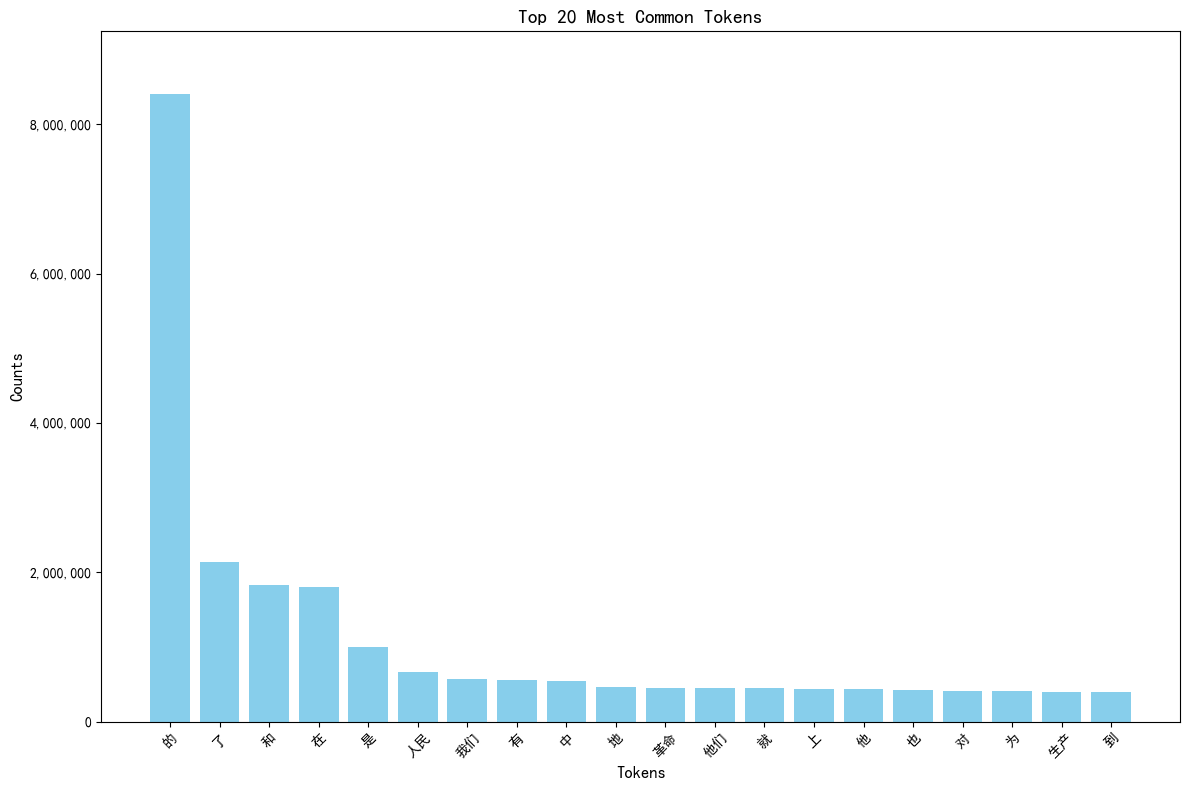

In [13]:
import matplotlib.ticker as mticker

# 设置中文字体（Windows 系统常用字体）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 提取数据
tokens, counts = zip(*most_common)

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(tokens, counts, color='skyblue')
plt.xlabel('Tokens', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Top 20 Most Common Tokens', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# 设置纵坐标范围和格式
plt.ylim(0, max(counts) + max(counts) * 0.1)  # 设置纵坐标范围，增加10%的空间
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 显示完整数字并加千分位

plt.tight_layout()
plt.show()

In [ ]:
import os
print("number of CPU:", os.cpu_count()) 

逻辑CPU数: 12


# Estimate Skip-gram with negative sampling

## c1t

In [ ]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from tqdm.auto import tqdm

class EpochProgress(CallbackAny2Vec):
    def __init__(self, epochs):
        self.epochs = epochs
        self.pbar = tqdm(total=epochs, desc="Training", unit="epoch")

    def on_epoch_end(self, model):
        self.pbar.update(1)
        self.pbar.set_postfix({
            "lr": f"{model.alpha:.1e}",
            "neg/pos": f"{model.negative}:1"  # 显示负采样比例
        })

    def on_train_end(self, model):
        self.pbar.close()

# 初始化模型
print("1. 构建词汇表...")
c1t_word2vec = Word2Vec(
    sentences=c1t,
    vector_size=100,
    min_count=1,
    window=6,
    negative=7,        # 设置负采样数为7
    ns_exponent=0.6,    # 优化负采样分布
    sample=1e-5,
    workers=4          # 必须多线程
)

print(f"2. 开始训练（共 {len(c1t_word2vec.wv)} 个单词）")
c1t_word2vec.train(
    c1t,
    total_examples=c1t_word2vec.corpus_count,
    epochs=50,          # 总轮次
    callbacks=[EpochProgress(50)],
    compute_loss=True
)

1. 构建词汇表...
2. 开始训练（共 805075 个单词）


Training:   0%|          | 0/50 [00:00<?, ?epoch/s]

(2378300780, 6047001450)

### save word2vec model

In [9]:
# 保存模型到本地文件
c1t_word2vec.save("D:\\CODE\\data set for QTA\\c1t_word2vec.model")

In [15]:
from gensim.models import Word2Vec

# 加载保存的模型
c1t_word2vec = Word2Vec.load("D:\\CODE\\data set for QTA\\c1t_word2vec.model")

# 使用模型
# 示例：获取某个词的词向量
# 查看模型中包含的所有词
words = list(c1t_word2vec.wv.key_to_index.keys())

# 打印前10个词
print(words[:10])  # 如果词很多，可以只打印一部分

vector = c1t_word2vec.wv['总书记']
print(vector)

['的', '了', '和', '在', '是', '人民', '我们', '有', '中', '地']
[ 4.188576   -2.3755822  -1.5388756   2.746306    2.6546469   2.1928177
  2.8792496  -2.2089274   0.31717968  1.9156256  -2.2183063  -3.902294
 -2.4633317  -0.39159167  1.3507919  -3.1166263   0.3340354   2.5098674
  2.5374458  -1.1268785  -0.4986599   0.30612093  0.8601566   1.951192
 -3.926479   -2.5156043  -0.61638856 -1.0594027  -0.7756711  -0.7432143
  1.6407039   3.6784484  -0.9232217  -3.4092064  -1.1433977   0.19905788
 -0.82064784  0.3152943   0.48489553 -1.6406058   3.596051    0.45023364
 -1.6234171  -1.3021034   3.914791    1.9705296  -1.1117843  -0.6742797
  1.6305215   3.542669   -0.19420119  1.1080418   0.85237163 -0.668188
  2.491812   -5.1451964  -0.59194183  4.9117293  -2.2861078   3.1129906
  0.13740498 -0.8001835  -0.41896805  2.3644025   1.1798898  -2.9378655
  0.83381706 -0.7447663  -0.57034135 -1.3753804   0.97318166 -4.580415
  0.49808192 -2.9577901  -2.2194386  -4.6464767   1.6152201  -0.7833324
 -2.3300881  

# Same training processes for rest of periods

# c2t

In [ ]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from tqdm.auto import tqdm

class EpochProgress(CallbackAny2Vec):
    def __init__(self, epochs):
        self.epochs = epochs
        self.pbar = tqdm(total=epochs, desc="Training", unit="epoch")

    def on_epoch_end(self, model):
        self.pbar.update(1)
        self.pbar.set_postfix({
            "lr": f"{model.alpha:.1e}",
            "neg/pos": f"{model.negative}:1"  # 显示负采样比例
        })

    def on_train_end(self, model):
        self.pbar.close()

# 初始化模型
print("1. 构建词汇表...")
c2t_word2vec = Word2Vec(
    sentences=c2t,
    vector_size=100,
    min_count=1,
    window=6,
    negative=7,        # 设置负采样数为7
    ns_exponent=0.6,    # 优化负采样分布
    sample=1e-5,
    workers=4          # 必须多线程
)

print(f"2. 开始训练（共 {len(c2t_word2vec.wv)} 个单词）")
c2t_word2vec.train(
    c2t,
    total_examples=c2t_word2vec.corpus_count,
    epochs=50,          # 总轮次
    callbacks=[EpochProgress(50)],
    compute_loss=True
)

1. 构建词汇表...
2. 开始训练（共 573223 个单词）


Training:   0%|          | 0/50 [00:00<?, ?epoch/s]

(1320238678, 3083706600)

In [ ]:
c2t_word2vec.save("D:\\CODE\\data set for QTA\\c2t_word2vec.model")

In [16]:
from gensim.models import Word2Vec

# 加载保存的模型
c2t_word2vec = Word2Vec.load("D:\\CODE\\data set for QTA\\c2t_word2vec.model")

# 使用模型
# 示例：获取某个词的词向量
# 查看模型中包含的所有词
words = list(c2t_word2vec.wv.key_to_index.keys())

# 打印前10个词
print(words[:10])  # 如果词很多，可以只打印一部分

vector = c2t_word2vec.wv['总书记']
print(vector)

['的', '了', '和', '在', '是', '有', '对', '要', '为', '他']
[ 0.65682316  2.6524823   0.53934634 -0.35256064 -0.4396486   2.2014601
 -2.0104551  -0.02336832 -1.1206108  -2.472436    0.47323275  3.0045333
 -0.10432408  0.8664373   0.39967403  0.43739206  1.98428     1.3911756
 -1.1280959   0.49954987  0.13849221  0.5025907  -2.545425   -4.120068
 -1.049025    0.5260222   0.25444338  2.3190675  -2.035496    3.476086
  6.1157637  -1.245136    0.83020854  0.527658   -0.6043027   1.910292
  0.47315073 -0.4488731  -2.5061767  -0.35275674 -0.7346657   1.5973567
  1.7543489   0.9158725  -0.01750252  1.7165451   0.65842813 -2.6385496
  1.2453505   0.763006   -2.2675269   1.8734772   0.11778945 -0.62023723
 -3.014822    0.49771714  0.42955458 -0.9061504  -5.59428    -0.9178229
  0.73467267 -2.5327704   2.7110817   3.961414   -3.655011   -1.9848248
  1.1997178  -2.1711993  -2.0652723  -0.8428319   0.3278303   1.5184946
 -1.6150578  -0.7463012  -0.6338699  -2.2992437   1.4540428  -2.2791657
  0.7485849   0

# c3t

In [ ]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from tqdm.auto import tqdm

class EpochProgress(CallbackAny2Vec):
    def __init__(self, epochs):
        self.epochs = epochs
        self.pbar = tqdm(total=epochs, desc="Training", unit="epoch")

    def on_epoch_end(self, model):
        self.pbar.update(1)
        self.pbar.set_postfix({
            "lr": f"{model.alpha:.1e}",
            "neg/pos": f"{model.negative}:1"  # 显示负采样比例
        })

    def on_train_end(self, model):
        self.pbar.close()

# 初始化模型
print("1. 构建词汇表...")
c3t_word2vec = Word2Vec(
    sentences=c3t,
    vector_size=100,
    min_count=1,
    window=6,
    negative=7,        # 设置负采样数为7
    ns_exponent=0.6,    # 优化负采样分布
    sample=1e-5,
    workers=4          # 必须多线程
)

print(f"2. 开始训练（共 {len(c3t_word2vec.wv)} 个单词）")
c3t_word2vec.train(
    c3t,
    total_examples=c3t_word2vec.corpus_count,
    epochs=50,          # 总轮次
    callbacks=[EpochProgress(50)],
    compute_loss=True
)

1. 构建词汇表...
2. 开始训练（共 521139 个单词）


Training:   0%|          | 0/50 [00:00<?, ?epoch/s]

(1230040903, 2892542150)

In [5]:
c3t_word2vec.save("D:\\CODE\\data set for QTA\\c3t_word2vec.model")

In [6]:
from gensim.models import Word2Vec

# 加载保存的模型
c3t_word2vec = Word2Vec.load("D:\\CODE\\data set for QTA\\c3t_word2vec.model")

# 使用模型
# 示例：获取某个词的词向量
# 查看模型中包含的所有词
words = list(c3t_word2vec.wv.key_to_index.keys())

# 打印前10个词
print(words[:10])  # 如果词很多，可以只打印一部分

vector = c3t_word2vec.wv['总书记']
print(vector)

['的', '和', '了', '在', '是', '为', '中国', '对', '月', '发展']
[-1.1442868   0.91202176  0.34174585  0.20071031 -1.5111876  -1.4310302
 -2.2881873   2.6059377   0.1511261  -2.1283038  -1.6829363   1.2540278
 -0.574658   -3.813215   -0.26276    -1.3398294   0.06501584  1.5916195
  0.783382    1.8758495   0.4643133   2.4230342   0.8679121  -2.9864666
  0.4468415  -0.19630632 -2.9924798   0.2337459   0.9201149   1.9707444
  1.2915028   2.8979192  -1.4679112  -0.688142    0.1760035  -0.13453002
 -3.0338867   0.3347095   0.52959603 -2.8483534   4.4683313  -0.492335
 -0.5242209   1.7193854  -0.19051309 -0.13591234  0.11538354  3.0770893
 -0.17876303  1.9164475   2.5314965  -0.62510884 -0.07753059 -2.0083342
  5.050232    0.48283717  0.7796506   2.744219    0.6627841   0.5253215
 -2.3557365   0.99257666 -1.5417353  -3.6742077   0.24720912 -3.2326403
  1.9541777  -1.2653373  -1.1620026   0.35269368 -4.708575   -1.3670363
 -2.142145   -0.1571868   1.7942446   2.2155564  -4.3184857  -1.2942683
 -2.1385787

In [ ]:

from collections import Counter
word_counts = Counter(word for sent in c1["tokens"] for word in sent)

# 重要指标
avg_freq = sum(word_counts.values()) / len(word_counts)  # 平均每个词出现次数
low_freq_ratio = sum(1 for cnt in word_counts.values() if cnt < 5) / len(word_counts)  # 低频词占比
print(f"平均每个词出现次数：{avg_freq:.2f}")
print(f"低频词占比：{low_freq_ratio:.2%}")

平均每个词出现次数：54312.62
低频词占比：26.02%


In [ ]:



from collections import Counter
word_counts = Counter(word for sent in c1["tokens"] for word in sent)

# 重要指标
avg_freq = sum(word_counts.values()) / len(word_counts)  # 平均每个词出现次数
low_freq_ratio = sum(1 for cnt in word_counts.values() if cnt < 5) / len(word_counts)  # 低频词占比
print(f"平均每个词出现次数：{avg_freq:.2f}")
print(f"低频词占比：{low_freq_ratio:.2%}")

In [1]:
import tensorflow as tf

# 检查是否有可用的 GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"检测到 {len(gpus)} 个 GPU：")
    for gpu in gpus:
        print(gpu)
else:
    print("未检测到 GPU，请检查驱动或安装配置。")

检测到 1 个 GPU：
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# 2. simple visiual for word count for each periods and common word count



In [3]:
import numpy as np
from scipy.spatial import procrustes  # 正确导入位置
from gensim.models import Word2Vec

c1t_w2v = Word2Vec.load("D:\\CODE\\data set for QTA\\c1t_word2vec.model")
c2t_w2v = Word2Vec.load("D:\\CODE\\data set for QTA\\c2t_word2vec.model")
c3t_w2v = Word2Vec.load("D:\\CODE\\data set for QTA\\c3t_word2vec.model")

In [4]:
# 验证模型是否成功加载
print("c1t_w2v词汇量:", len(c1t_w2v.wv.key_to_index))  # 1946-1976模型
print("c2t_w2v词汇量:", len(c2t_w2v.wv.key_to_index))  # 1977-1989模型
print("c3t_w2v词汇量:", len(c3t_w2v.wv.key_to_index))  # 1990-2003模型

# 修正公共词汇提取
common_words = set(c1t_w2v.wv.key_to_index) & set(c2t_w2v.wv.key_to_index) & set(c3t_w2v.wv.key_to_index)
print("跨时期共有词汇量:", len(common_words))  # 确保至少有1000+公共词

c1t_w2v词汇量: 805075
c2t_w2v词汇量: 573223
c3t_w2v词汇量: 521139
跨时期共有词汇量: 217612


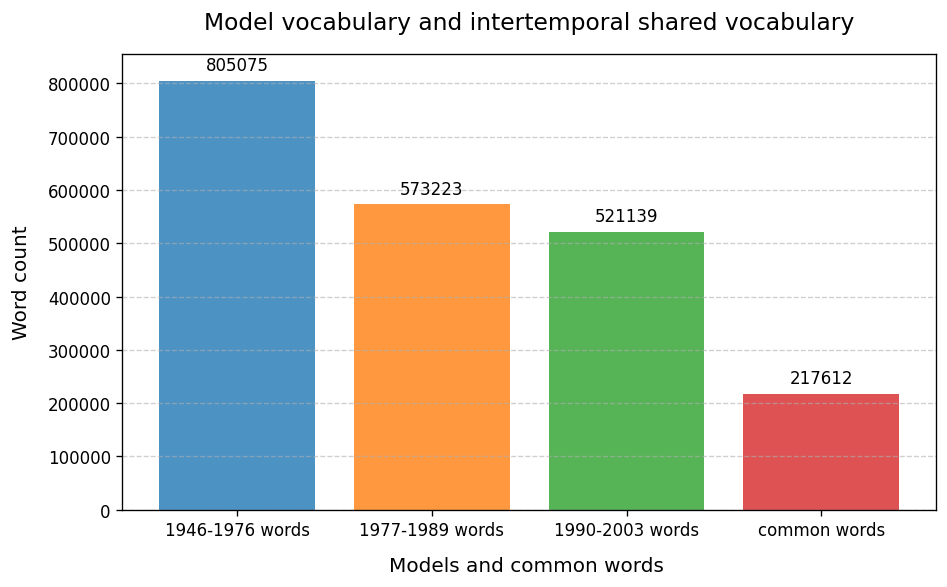

In [ ]:
import matplotlib.pyplot as plt

# 数据
models = ["1946-1976 words", "1977-1989 words", "1990-2003 words", "common words"]
vocab_sizes = [
    len(c1t_w2v.wv.key_to_index),  # 1946-1976模型词汇量
    len(c2t_w2v.wv.key_to_index),  # 1977-1989模型词汇量
    len(c3t_w2v.wv.key_to_index),  # 1990-2003模型词汇量
    len(common_words)              # 跨时期共有词汇量
]

# 绘制柱状图
plt.figure(figsize=(8, 5), dpi=120)
plt.bar(models, vocab_sizes, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], alpha=0.8)

# 添加数据标签
for i, size in enumerate(vocab_sizes):
    plt.text(i, size + 20000, str(size), ha='center', fontsize=10)

# 图表设置
plt.title("Model vocabulary and intertemporal shared vocabulary", fontsize=14, pad=15)
plt.xlabel("Models and common words ", fontsize=12, labelpad=10)
plt.ylabel("Word count", fontsize=12, labelpad=10)
plt.ylim(0, max(vocab_sizes) + 50000)  # 设置 y 轴范围
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# show the plot
plt.show()